#### CONVOLUTIONAL NEURAL NETWORK (CNN) :
#### CATS AND DOGS CLASSIFICATION :

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
# 2. Define image properties:

Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

#### Prepare dataset for training model:

In [81]:
filenames = os.listdir("./train/train")
filenames[:7]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg']

In [82]:
filenames[-7:]

['dog.9993.jpg',
 'dog.9994.jpg',
 'dog.9995.jpg',
 'dog.9996.jpg',
 'dog.9997.jpg',
 'dog.9998.jpg',
 'dog.9999.jpg']

In [83]:
categories = []

for files in filenames:
    if files.split('.')[0] == 'cat':
        categories.append(0)
    else:
        categories.append(1)

In [84]:
df = pd.DataFrame({'name':filenames, 'class':categories})

In [87]:
df[-5:]

,name,class
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


In [88]:
df[:5]

,name,class
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [114]:
df['class'].value_counts()

1    12500
0    12500
Name: class, dtype: int64

##### WE HAVE EQUAL NO. OF CLASSES OF EACH CATEGORY. HENCE THE DATASET IS BALANCED.

In [89]:
# NEURAL NETWORK MODEL - CNN :

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

In [90]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

In [91]:
# MODEL COMPILATION :

model.compile(loss='binary_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [92]:
#5. Analyzing model:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)       

In [93]:
# Callbacks and learning rate:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [94]:
# Managing data:

df["class"] = df["class"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=20)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [97]:
# Model Training :

train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./train/train/",x_col='name',y_col='class',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/train/", 
    x_col='name',
    y_col='class',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = test_datagen.flow_from_dataframe(validate_df,
                                                 "./test1/test1/",x_col='name',y_col='class',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 0 classes.


In [98]:
# Training the Model :

epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
1333/1333 [==============================] - 840s 630ms/step - loss: 0.4667 - accuracy: 0.7788 - val_loss: 0.6275 - val_accuracy: 0.7301
Epoch 2/10
1333/1333 [==============================] - 776s 582ms/step - loss: 0.4406 - accuracy: 0.7957 - val_loss: 0.3494 - val_accuracy: 0.8462
Epoch 3/10
1333/1333 [==============================] - 845s 634ms/step - loss: 0.4216 - accuracy: 0.8040 - val_loss: 0.4678 - val_accuracy: 0.7738
Epoch 4/10
1333/1333 [==============================] - 33497s 25s/step - loss: 0.4058 - accuracy: 0.8174 - val_loss: 0.7064 - val_accuracy: 0.6452
Epoch 5/10
1333/1333 [==============================] - 1235s 926ms/step - loss: 0.3887 - accuracy: 0.8267 - val_loss: 0.3955 - val_accuracy: 0.8440
Epoch 6/10
1333/1333 [==============================] - 1135s 851ms/step - loss: 0.3799 - accuracy: 0.8310 - val_loss: 0.3414 - val_accuracy: 0.8623
Epoch 7/10
1333/1333 [==============================] - 1127s 845ms/step - loss: 0.3723 - accuracy: 0.8378 - v

In [99]:
# Save the Model :

model.save("model1_catsVSdogs_10epoch.h5")

In [100]:

# Prepare Test data :

test_filenames = os.listdir("./test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


# Make categorical prediction:
#predict = model.predict(test_generator)  #, steps=np.ceil(nb_samples/batch_size)

# Convert labels to categories:
#test_df['category'] = np.argmax(predict, axis=-1)
#label_map = dict((v,k) for k,v in train_generator.class_indices.items())
#test_df['category'] = test_df['category'].replace(label_map)
#test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


##### MAKING PREDICTIONS :

In [101]:
from keras.preprocessing import image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(128, 128))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

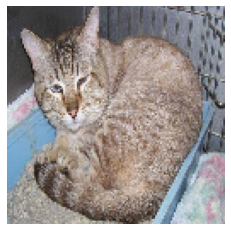

In [102]:
img = load_image('./test1/test1/300.jpg', True)

In [103]:
pred_val = model.predict(img) 
pred = np.argmax(pred_val, axis=-1)
print(pred_val)
print(pred)

[[9.9965560e-01 3.4439564e-04]]
[0]


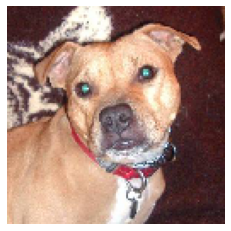

In [104]:
img = load_image('./test1/test1/2.jpg', True)

In [105]:
pred_val = model.predict(img) 
pred = np.argmax(pred_val, axis=-1)
print(pred_val)
print(pred)

[[2.130568e-04 9.997869e-01]]
[1]
